In [ ]:
import pandas as pd
import numpy as np
data=pd.read_csv("C:\Users\SURAJ YADAV\OneDrive\Desktop\Projects/heart.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [177]:
X=data.drop(columns=['target'])
print(X)
Y=data['target']
print(Y)

      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0      52    1   0       125   212    0        1      168      0      1.0   
1      53    1   0       140   203    1        0      155      1      3.1   
2      70    1   0       145   174    0        1      125      1      2.6   
3      61    1   0       148   203    0        1      161      0      0.0   
4      62    0   0       138   294    1        1      106      0      1.9   
...   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0       110   275    0        0      118      1      1.0   
1023   50    0   0       110   254    0        0      159      0      0.0   
1024   54    1   0       120   188    0        1      113      0      1.4   

      slope  ca  thal  
0         2   2     3  
1         0   0     3  
2  

In [178]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
val_accuracies = []

In [179]:
model = Sequential()
model.add(Dense(32, activation='sigmoid', input_dim=13))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(4, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [180]:
model.summary()

Model: "sequential_62"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_355 (Dense)               │ (None, 32)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_356 (Dense)               │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_357 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_358 (Dense)               │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_359 (Dense)               │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,153 (4.50 KB)

 Trainable params: 1,153 (4.50 KB)

 Non-trainable params: 0 (0.00 B)

In [181]:
# 1st Architecture
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])


In [182]:
history=model.fit(X,Y,batch_size=50,epochs=100,validation_split=0.2)
val_accuracies.append(max(history.history['val_accuracy']))

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5577 - loss: 0.6872 - val_accuracy: 0.4829 - val_loss: 0.7034
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5113 - loss: 0.6961 - val_accuracy: 0.4829 - val_loss: 0.6978
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5113 - loss: 0.6935 - val_accuracy: 0.4829 - val_loss: 0.6958
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5337 - loss: 0.6899 - val_accuracy: 0.4829 - val_loss: 0.6949
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5273 - loss: 0.6899 - val_accuracy: 0.4829 - val_loss: 0.6935
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5112 - loss: 0.6905 - val_accuracy: 0.4829 - val_loss: 0.6927
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5340 - loss: 0.6880 - val_accuracy: 0.4829 - val_loss: 0.6929
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5375 - loss: 0.6861 - val_accuracy: 0.482

In [183]:
model = Sequential()
model.add(Dense(18, activation='sigmoid', input_dim=13))
model.add(Dense(27, activation='tanh'))
model.add(Dense(36, activation='tanh'))
model.add(Dense(18, activation='tanh'))
model.add(Dense(9, activation='tanh'))
model.add(Dense(1, activation='tanh'))
model.summary()
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_63"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_360 (Dense)               │ (None, 18)             │           252 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_361 (Dense)               │ (None, 27)             │           513 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_362 (Dense)               │ (None, 36)             │         1,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_363 (Dense)               │ (None, 18)             │           666 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_364 (Dense)               │ (None, 9)              │           171 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_365 (Dense)               │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,620 (10.23 KB)

 Trainable params: 2,620 (10.23 KB)

 Non-trainable params: 0 (0.00 B)

In [184]:
# 2nd Architecture
history=model.fit(X,Y,batch_size=50,epochs=100,validation_split=0.2)
val_accuracies.append(max(history.history['val_accuracy']))

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5517 - loss: 1.7382 - val_accuracy: 0.4829 - val_loss: 0.8408
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4983 - loss: 0.7837 - val_accuracy: 0.5463 - val_loss: 0.6754
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6061 - loss: 0.6546 - val_accuracy: 0.5951 - val_loss: 0.6518
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6381 - loss: 0.6286 - val_accuracy: 0.5707 - val_loss: 0.6581
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6621 - loss: 0.6108 - val_accuracy: 0.5902 - val_loss: 0.6720
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6664 - loss: 0.6117 - val_accuracy: 0.6293 - val_loss: 0.8226
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6583 - loss: 0.6289 - val_accuracy: 0.5415 - val_loss: 0.7128
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6672 - loss: 0.6085 - val_accuracy: 0.6439 - 

In [185]:
model = Sequential()
model.add(Dense(18, activation='sigmoid', input_dim=13))
model.add(Dense(27, activation='tanh'))
model.add(Dense(36, activation='tanh'))
model.add(Dense(18, activation='tanh'))
model.add(Dense(9, activation='tanh'))
model.add(Dense(1, activation='tanh'))
model.summary()
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_64"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_366 (Dense)               │ (None, 18)             │           252 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_367 (Dense)               │ (None, 27)             │           513 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_368 (Dense)               │ (None, 36)             │         1,008 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_369 (Dense)               │ (None, 18)             │           666 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_370 (Dense)               │ (None, 9)              │           171 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_371 (Dense)               │ (None, 1)              │            10 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,620 (10.23 KB)

 Trainable params: 2,620 (10.23 KB)

 Non-trainable params: 0 (0.00 B)

In [186]:
# 3rd Architecture
history=model.fit(X,Y,batch_size=50,epochs=100,validation_split=0.2)
val_accuracies.append(max(history.history['val_accuracy']))

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6241 - loss: 0.6596 - val_accuracy: 0.5756 - val_loss: 0.6942
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6365 - loss: 0.6464 - val_accuracy: 0.5951 - val_loss: 0.6918
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6099 - loss: 0.6594 - val_accuracy: 0.5366 - val_loss: 0.6972
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6074 - loss: 0.6462 - val_accuracy: 0.5854 - val_loss: 0.6765
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6317 - loss: 0.6701 - val_accuracy: 0.5805 - val_loss: 0.6931
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6726 - loss: 0.6223 - val_accuracy: 0.6146 - val_loss: 0.6742
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6391 - loss: 0.6342 - val_accuracy: 0.6098 - val_loss: 0.6763
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6537 - loss: 0.6318 - val_accuracy: 0.6146 - 

In [187]:
model= Sequential()
model.add(Dense(20,activation='sigmoid',input_dim=13))
model.add(Dense(30,activation='tanh'))
model.add(Dense(20,activation='sigmoid'))
model.add(Dense(10,activation='tanh'))
model.add(Dense(1,activation='sigmoid'))
model.summary()
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_65"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_372 (Dense)               │ (None, 20)             │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_373 (Dense)               │ (None, 30)             │           630 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_374 (Dense)               │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_375 (Dense)               │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_376 (Dense)               │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,751 (6.84 KB)

 Trainable params: 1,751 (6.84 KB)

 Non-trainable params: 0 (0.00 B)

In [188]:
# 4th Architecture
history=model.fit(X,Y,batch_size=50,epochs=100,validation_split=0.2)
val_accuracies.append(max(history.history['val_accuracy']))

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 35ms/step - accuracy: 0.4851 - loss: 0.7035 - val_accuracy: 0.4829 - val_loss: 0.6914
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5315 - loss: 0.6842 - val_accuracy: 0.5707 - val_loss: 0.6835
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.6424 - loss: 0.6706 - val_accuracy: 0.5805 - val_loss: 0.6725
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6719 - loss: 0.6554 - val_accuracy: 0.6341 - val_loss: 0.6593
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6822 - loss: 0.6388 - val_accuracy: 0.6049 - val_loss: 0.6529
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6784 - loss: 0.6224 - val_accuracy: 0.6390 - val_loss: 0.6405
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7064 - loss: 0.5927 - val_accuracy: 0.6439 - val_loss: 0.6387
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6904 - loss: 0.5937 - val_accuracy: 0.6

In [189]:
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_dim=13))
model.add(Dense(15, activation='sigmoid'))
model.add(Dense(20, activation='sigmoid'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(5, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_66"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_377 (Dense)               │ (None, 10)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_378 (Dense)               │ (None, 15)             │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_379 (Dense)               │ (None, 20)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_380 (Dense)               │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_381 (Dense)               │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_382 (Dense)               │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

In [190]:
# 5th Architecture
history=model.fit(X,Y,batch_size=50,epochs=100,validation_split=0.2)
val_accuracies.append(max(history.history['val_accuracy']))

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.5401 - loss: 0.6943 - val_accuracy: 0.4829 - val_loss: 0.7094
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5192 - loss: 0.6978 - val_accuracy: 0.4829 - val_loss: 0.7034
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5282 - loss: 0.6925 - val_accuracy: 0.4829 - val_loss: 0.6997
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5220 - loss: 0.6928 - val_accuracy: 0.4829 - val_loss: 0.6981
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5217 - loss: 0.6925 - val_accuracy: 0.4829 - val_loss: 0.6971
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5242 - loss: 0.6918 - val_accuracy: 0.4829 - val_loss: 0.6962
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5015 - loss: 0.6942 - val_accuracy: 0.4829 - val_loss: 0.6957
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5565 - loss: 0.6886 - val_accuracy: 0.4829 -

In [191]:
model = Sequential()
model.add(Dense(16, activation='sigmoid', input_dim=13))
model.add(Dense(24, activation='relu'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(24, activation='relu'))
model.add(Dense(16, activation='sigmoid'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_67"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_383 (Dense)               │ (None, 16)             │           224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_384 (Dense)               │ (None, 24)             │           408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_385 (Dense)               │ (None, 32)             │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_386 (Dense)               │ (None, 24)             │           792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_387 (Dense)               │ (None, 16)             │           400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_388 (Dense)               │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_389 (Dense)               │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,769 (10.82 KB)

 Trainable params: 2,769 (10.82 KB)

 Non-trainable params: 0 (0.00 B)

In [192]:
# 6th Architecture
history=model.fit(X,Y,batch_size=50,epochs=100,validation_split=0.2)
val_accuracies.append(max(history.history['val_accuracy']))

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.5151 - loss: 0.7439 - val_accuracy: 0.4829 - val_loss: 0.7293
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5512 - loss: 0.6920 - val_accuracy: 0.4829 - val_loss: 0.7073
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5116 - loss: 0.6976 - val_accuracy: 0.4829 - val_loss: 0.6973
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4971 - loss: 0.6950 - val_accuracy: 0.4829 - val_loss: 0.6947
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5180 - loss: 0.6917 - val_accuracy: 0.4829 - val_loss: 0.6945
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5246 - loss: 0.6911 - val_accuracy: 0.4829 - val_loss: 0.6947
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5322 - loss: 0.6900 - val_accuracy: 0.4829 - val_loss: 0.6941
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5241 - loss: 0.6903 - val_accuracy: 0.4829 -

In [193]:
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_dim=13))
model.add(Dense(15, activation='tanh'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(1, activation='relu'))
model.summary()
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_68"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_390 (Dense)               │ (None, 10)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_391 (Dense)               │ (None, 15)             │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_392 (Dense)               │ (None, 20)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_393 (Dense)               │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_394 (Dense)               │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_395 (Dense)               │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

In [194]:
# 7th Architecture
history=model.fit(X,Y,batch_size=50,epochs=100,validation_split=0.2)
val_accuracies.append(max(history.history['val_accuracy']))

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4806 - loss: 0.8019 - val_accuracy: 0.4829 - val_loss: 0.7057
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5217 - loss: 0.6944 - val_accuracy: 0.4878 - val_loss: 0.6929
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5570 - loss: 0.6830 - val_accuracy: 0.6341 - val_loss: 0.6851
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6159 - loss: 0.6801 - val_accuracy: 0.5902 - val_loss: 0.6833
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6389 - loss: 0.6742 - val_accuracy: 0.5707 - val_loss: 0.6798
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6374 - loss: 0.6685 - val_accuracy: 0.5854 - val_loss: 0.6760
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6276 - loss: 0.6639 - val_accuracy: 0.6098 - val_loss: 0.6713
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6554 - loss: 0.6601 - val_accuracy: 0.5756 - 

In [195]:
model = Sequential()
model.add(Dense(24, activation='sigmoid', input_dim=13))
model.add(Dense(25, activation='tanh'))
model.add(Dense(26, activation='relu'))
model.add(Dense(25, activation='sigmoid'))
model.add(Dense(24, activation='tanh'))
model.add(Dense(23, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_69"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_396 (Dense)               │ (None, 24)             │           336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_397 (Dense)               │ (None, 25)             │           625 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_398 (Dense)               │ (None, 26)             │           676 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_399 (Dense)               │ (None, 25)             │           675 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_400 (Dense)               │ (None, 24)             │           624 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_401 (Dense)               │ (None, 23)             │           575 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_402 (Dense)               │ (None, 1)              │            24 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,535 (13.81 KB)

 Trainable params: 3,535 (13.81 KB)

 Non-trainable params: 0 (0.00 B)

In [196]:
# 8th Architecture
history=model.fit(X,Y,batch_size=50,epochs=100,validation_split=0.2)
val_accuracies.append(max(history.history['val_accuracy']))

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.5231 - loss: 0.6921 - val_accuracy: 0.4829 - val_loss: 0.6916
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5893 - loss: 0.6814 - val_accuracy: 0.4976 - val_loss: 0.6826
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6353 - loss: 0.6618 - val_accuracy: 0.6732 - val_loss: 0.6562
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6475 - loss: 0.6361 - val_accuracy: 0.6488 - val_loss: 0.6393
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6763 - loss: 0.6045 - val_accuracy: 0.6732 - val_loss: 0.6334
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7332 - loss: 0.5700 - val_accuracy: 0.6829 - val_loss: 0.6144
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6965 - loss: 0.5889 - val_accuracy: 0.6439 - val_loss: 0.6618
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.7202 - loss: 0.5540 - val_accuracy: 0.6927 - 

In [197]:
model = Sequential()
model.add(Dense(10, activation='sigmoid', input_dim=13))
model.add(Dense(15, activation='tanh'))
model.add(Dense(20, activation='relu'))
model.add(Dense(10, activation='sigmoid'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(1, activation='relu'))
model.summary()
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_70"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_403 (Dense)               │ (None, 10)             │           140 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_404 (Dense)               │ (None, 15)             │           165 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_405 (Dense)               │ (None, 20)             │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_406 (Dense)               │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_407 (Dense)               │ (None, 5)              │            55 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_408 (Dense)               │ (None, 1)              │             6 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 896 (3.50 KB)

 Trainable params: 896 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

In [198]:
# 9th Architecture
history=model.fit(X,Y,batch_size=50,epochs=100,validation_split=0.2)
val_accuracies.append(max(history.history['val_accuracy']))

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.4742 - loss: 0.8722 - val_accuracy: 0.5171 - val_loss: 0.6913
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5191 - loss: 0.6931 - val_accuracy: 0.4829 - val_loss: 0.7040
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.5292 - loss: 0.6880 - val_accuracy: 0.4829 - val_loss: 0.6927
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5423 - loss: 0.6856 - val_accuracy: 0.6293 - val_loss: 0.6845
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6090 - loss: 0.6812 - val_accuracy: 0.5415 - val_loss: 0.6844
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5574 - loss: 0.6783 - val_accuracy: 0.5756 - val_loss: 0.6814
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5615 - loss: 0.6739 - val_accuracy: 0.5561 - val_loss: 0.6760
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.5818 - loss: 0.6639 - val_accuracy: 0.5610 - 

In [199]:
model= Sequential()
model.add(Dense(26,activation='sigmoid',input_dim=13))
model.add(Dense(13,activation='sigmoid'))
model.add(Dense(1,activation='sigmoid'))
model.summary()
model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_71"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_409 (Dense)               │ (None, 26)             │           364 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_410 (Dense)               │ (None, 13)             │           351 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_411 (Dense)               │ (None, 1)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 729 (2.85 KB)

 Trainable params: 729 (2.85 KB)

 Non-trainable params: 0 (0.00 B)

In [200]:
# 10th Architecture
history=model.fit(X,Y,batch_size=50,epochs=100,validation_split=0.2)
val_accuracies.append(max(history.history['val_accuracy']))

Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5298 - loss: 0.6910 - val_accuracy: 0.5366 - val_loss: 0.6929
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6080 - loss: 0.6824 - val_accuracy: 0.5756 - val_loss: 0.6771
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6214 - loss: 0.6682 - val_accuracy: 0.6195 - val_loss: 0.6745
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6497 - loss: 0.6601 - val_accuracy: 0.6244 - val_loss: 0.6691
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6442 - loss: 0.6534 - val_accuracy: 0.6488 - val_loss: 0.6639
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.6630 - loss: 0.6477 - val_accuracy: 0.6537 - val_loss: 0.6615
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6444 - loss: 0.6489 - val_accuracy: 0.6634 - val_loss: 0.6548
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6427 - loss: 0.6402 - val_accuracy: 0.6488 - 

Highest Validation Accuracy: 85.37%
Best performing model was architecture #1



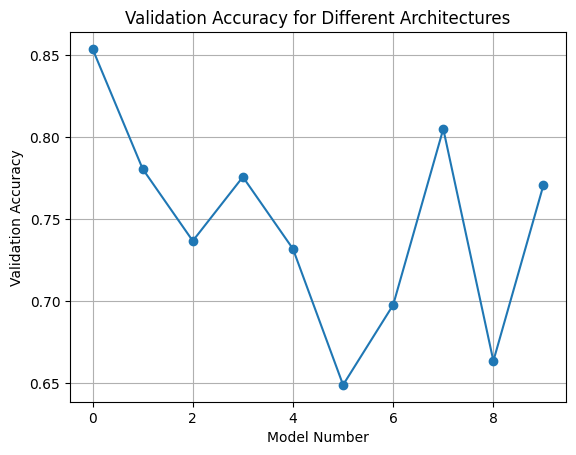

In [201]:
best_accuracy = max(val_accuracies)
best_model_index = val_accuracies.index(best_accuracy) + 1
print(f"Highest Validation Accuracy: {best_accuracy*100:.2f}%")
print(f"Best performing model was architecture #{best_model_index}\n")

import matplotlib.pyplot as plt

import matplotlib.pyplot as plt

plt.plot(val_accuracies, marker='o')
plt.title('Validation Accuracy for Different Architectures')
plt.xlabel('Model Number')
plt.ylabel('Validation Accuracy')
plt.grid(True)
plt.show()
